In [ ]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [ ]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('RioTomatlan.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [ ]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

In [11]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [9]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DIRS               int64
DIRR               int64
VELS             float64
VELR             float64
TEMP             float64
HR                 int64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [8]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [14]:
df.head(10)

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,184,211,2.13,18.4,26.0,68,995.8,0.3,224.0,2018-01-25 22:00:00
1,0,236,0.00,0.0,26.2,71,995.9,0.0,126.2,2018-01-25 23:00:00
2,0,305,0.00,0.0,26.0,71,996.0,0.0,37.8,2018-01-26 00:00:00
3,0,343,0.00,0.0,25.2,74,996.4,0.0,0.0,2018-01-26 01:00:00
4,0,320,0.00,0.0,24.1,77,996.9,0.0,0.0,2018-01-26 02:00:00
5,44,53,3.34,18.9,23.8,78,997.5,0.0,0.0,2018-01-26 03:00:00
6,36,45,5.50,17.7,23.1,80,998.0,0.0,0.0,2018-01-26 04:00:00
7,14,30,5.63,16.4,22.9,81,997.9,0.0,0.0,2018-01-26 05:00:00
8,359,356,4.30,16.5,22.6,81,997.7,0.0,0.0,2018-01-26 06:00:00
9,325,25,1.02,15.3,22.5,81,997.3,0.0,0.0,2018-01-26 07:00:00


In [15]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,64.963855,131.777108,2.132952,9.692169,24.340361,67.132530,995.138554,0.009639,152.165663
std,93.298731,110.385022,3.273923,9.384778,3.217829,13.642866,1.827423,0.076459,240.971915
min,0.000000,1.000000,0.000000,0.000000,19.400000,33.000000,991.200000,0.000000,0.000000
25%,0.000000,49.000000,0.000000,0.000000,21.900000,58.000000,993.800000,0.000000,0.000000
50%,33.500000,71.500000,0.075000,11.250000,23.850000,70.000000,995.100000,0.000000,0.100000
75%,67.500000,186.750000,3.505000,16.500000,26.075000,78.750000,996.400000,0.000000,214.475000
max,359.000000,356.000000,17.470000,35.700000,32.900000,87.000000,999.200000,0.800000,835.000000


In [16]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
4,0,320,0.00,0.0,24.1,77,996.9,0.0,0.0,2018-01-26 02:00:00
29,0,65,0.00,1.6,24.7,52,995.0,0.0,0.0,2018-01-27 03:00:00
30,353,351,0.03,7.7,24.5,56,995.2,0.0,0.0,2018-01-27 04:00:00
43,0,7,0.00,0.0,24.4,73,995.4,0.0,712.0,2018-01-27 17:00:00
76,179,187,4.40,16.7,24.9,58,994.5,0.0,0.0,2018-01-29 02:00:00
91,0,32,0.00,4.6,24.6,79,995.1,0.0,451.2,2018-01-29 17:00:00
101,41,58,1.89,16.0,24.9,68,995.2,0.0,0.0,2018-01-30 03:00:00
102,49,62,3.51,17.3,24.3,72,995.3,0.0,0.0,2018-01-30 04:00:00
109,43,31,10.34,22.2,24.5,59,992.4,0.0,0.0,2018-01-30 11:00:00
115,37,75,0.05,11.3,24.7,54,996.4,0.0,187.3,2018-01-30 17:00:00


In [17]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       64.963855
DIRR      131.777108
VELS        2.132952
VELR        9.692169
TEMP       24.340361
HR         67.132530
PB        995.138554
PREC        0.009639
RADSOL    152.165663
dtype: float64

In [18]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

24.340361445783135

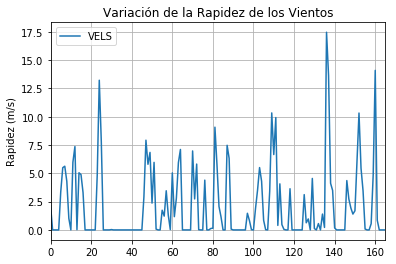

In [19]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

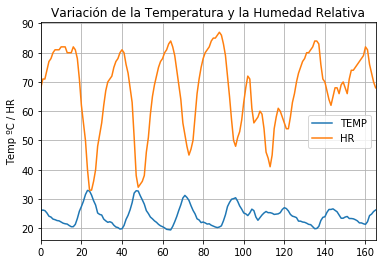

In [35]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC / HR")
plt.grid(True)
plt.show()

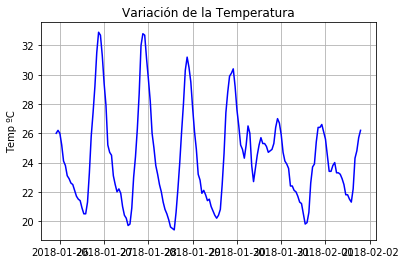

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

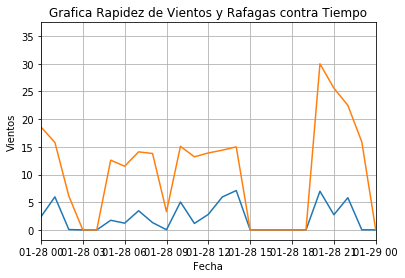

In [54]:
x=df['FECHA']
y=df[['VELS','VELR']]
 
plt.plot(x,y)
plt.xlabel('Fecha')
plt.xlim(['2018-01-28','2018-01-29'])
plt.ylabel('Vientos')
plt.title('Grafica Rapidez de Vientos y Rafagas contra Tiempo')

plt.grid(True)
plt.legend()
 
plt.show()

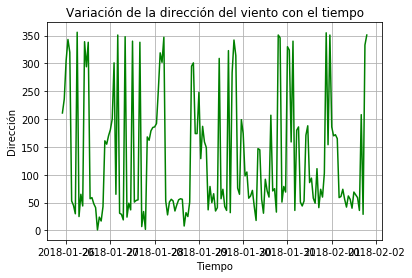

In [55]:
plt.plot_date(x=df.FECHA, y=df.DIRR, fmt="g-")
plt.title("Variación de la dirección del viento con el tiempo")
plt.ylabel("Dirección")
plt.xlabel("Tiempo")
plt.grid(True)
plt.show()

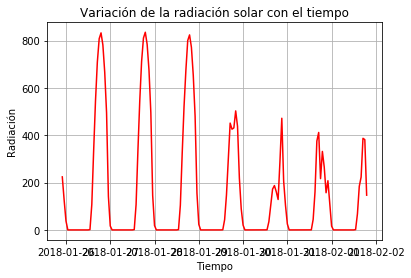

In [57]:
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="r-")
plt.title("Variación de la radiación solar con el tiempo")
plt.ylabel("Radiación")
plt.xlabel("Tiempo")
plt.grid(True)
plt.show()

In [16]:
# Selecciona los renglones con Fecha entre '2018-01-28','2018-01-29' > 
df_fch = df[df.FECHA >= '2018-01-28 00:00:00'] 
df_select = df_fch[df_fch.FECHA < '2018-01-29 00:00:00']
df_select

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
50,28/01/2018,00:00,197,186,2.37,18.6,29.7,36,991.5,0.0,18.3,2018-01-28 00:00:00
51,28/01/2018,01:00,180,192,5.97,15.8,28.2,38,992.1,0.0,0.0,2018-01-28 01:00:00
52,28/01/2018,02:00,273,252,0.07,6.1,26.0,46,992.9,0.0,0.0,2018-01-28 02:00:00
53,28/01/2018,03:00,0,319,0.00,0.0,25.0,51,993.6,0.0,0.0,2018-01-28 03:00:00
54,28/01/2018,04:00,0,302,0.00,0.0,23.8,59,993.8,0.0,0.0,2018-01-28 04:00:00
55,28/01/2018,05:00,332,347,1.74,12.6,23.2,65,994.2,0.0,0.0,2018-01-28 05:00:00
56,28/01/2018,06:00,44,53,1.22,11.5,22.5,69,994.1,0.0,0.0,2018-01-28 06:00:00
57,28/01/2018,07:00,43,28,3.46,14.1,22.0,72,994.1,0.0,0.0,2018-01-28 07:00:00
58,28/01/2018,08:00,57,51,1.32,13.8,21.3,75,994.1,0.0,0.0,2018-01-28 08:00:00
59,28/01/2018,09:00,36,56,0.03,3.3,20.8,77,993.9,0.0,0.0,2018-01-28 09:00:00


In [17]:
df_select

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
50,28/01/2018,00:00,197,186,2.37,18.6,29.7,36,991.5,0.0,18.3,2018-01-28 00:00:00
51,28/01/2018,01:00,180,192,5.97,15.8,28.2,38,992.1,0.0,0.0,2018-01-28 01:00:00
52,28/01/2018,02:00,273,252,0.07,6.1,26.0,46,992.9,0.0,0.0,2018-01-28 02:00:00
53,28/01/2018,03:00,0,319,0.00,0.0,25.0,51,993.6,0.0,0.0,2018-01-28 03:00:00
54,28/01/2018,04:00,0,302,0.00,0.0,23.8,59,993.8,0.0,0.0,2018-01-28 04:00:00
55,28/01/2018,05:00,332,347,1.74,12.6,23.2,65,994.2,0.0,0.0,2018-01-28 05:00:00
56,28/01/2018,06:00,44,53,1.22,11.5,22.5,69,994.1,0.0,0.0,2018-01-28 06:00:00
57,28/01/2018,07:00,43,28,3.46,14.1,22.0,72,994.1,0.0,0.0,2018-01-28 07:00:00
58,28/01/2018,08:00,57,51,1.32,13.8,21.3,75,994.1,0.0,0.0,2018-01-28 08:00:00
59,28/01/2018,09:00,36,56,0.03,3.3,20.8,77,993.9,0.0,0.0,2018-01-28 09:00:00


In [19]:
df_select.TEMP.max()-

31.199999999999999

In [20]:
df_select.TEMP.min()

19.399999999999999

In [21]:
df_select.TEMP.max()-df_select.TEMP.min()

11.800000000000001